In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

` Loading Data`

In [19]:
data = pd.read_csv('data_for_lr.csv')
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [21]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [22]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [23]:
data.shape

(700, 2)

In [24]:
data1 = data.dropna()
data1.shape

(699, 2)

` Splitting the data `

In [38]:
# training input and output

train_input = np.array(data1.x[0:500]).reshape(500,1)
train_output = np.array(data1.y[0:500]).reshape(500,1)

#validation data input and output

test_input = np.array(data1.x[500:699]).reshape(199,1)
test_output = np.array(data1.y[500:699]).reshape(199,1)

# <font color = 'green'>Linear Regression</font>

` Forward Propagation `

In [39]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']

    predictions = np.multiply(m, train_input) + c

    return predictions

` Cost Function `

In [40]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions)**2) * 0.5

    return cost

` Gradient Descent for Backpropagation `

In [41]:
def backward_propagation(train_input, train_output, predictions):

    derivatives = dict()
    
    df = predictions - train_output
    dm = np.mean(np.multiply(df, train_input))
    dc = np.mean(df)

    derivatives['dm'] = dm
    derivatives['dc'] = dc

    return derivatives

` Update Parameters `

In [42]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate*derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate*derivatives['dc']

    return parameters

` Model Training `

In [43]:
def train(train_input, train_output, learning_rate, iters):

    #random parameters
    parameters = dict()
    parameters['m'] = np.random.uniform(0,1)
    parameters['c'] = np.random.uniform(0,1)

    plt.figure()

    #loss
    loss = list()

    #iteration
    for i in range(iters):

        #forward propagation
        predictions = forward_propagation(train_input, parameters)

        #cost
        cost = cost_function(predictions, train_output)

        loss.append(cost)
        print(f"Iteration = {i+1}, Loss = {cost}")

        #plot
        fig, ax = plt.subplots()

        ax.plot(train_input, train_output, '+', label = 'Original')
        ax.plot(train_input, predictions, '+', label = 'Training')

        legend = ax.legend()

        plt.plot(train_input, train_output, '+', label = 'Original')
        plt.plot(train_input, predictions, '+', label = 'Training')
        plt.show()

        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)

        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)

    return parameters, loss

    


` Training `

Iteration = 1, Loss = 589.9439138361772


<Figure size 640x480 with 0 Axes>

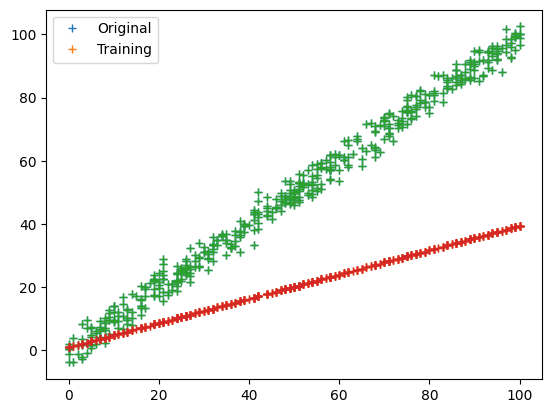

Iteration = 2, Loss = 269.8876528785129


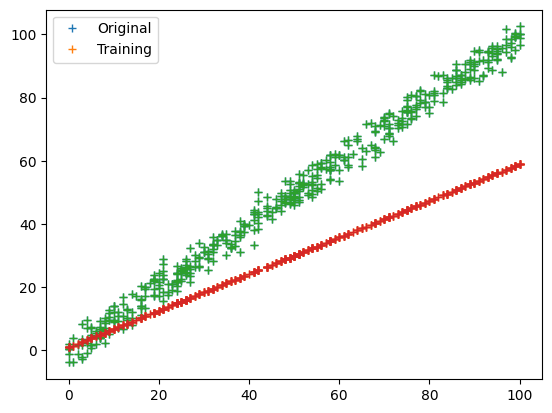

Iteration = 3, Loss = 124.6777680787035


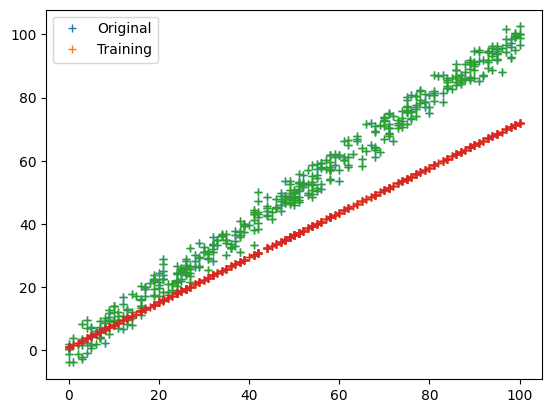

Iteration = 4, Loss = 58.79587780900173


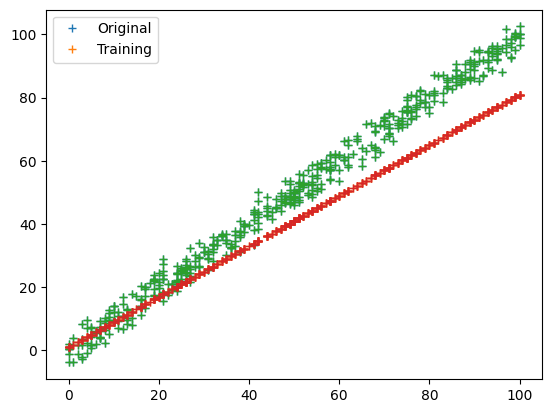

Iteration = 5, Loss = 28.90518652480252


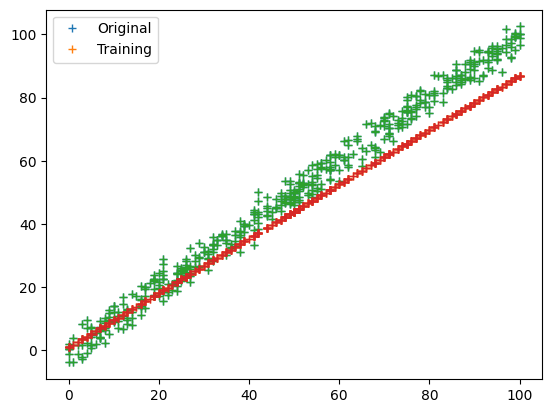

Iteration = 6, Loss = 15.343742085897702


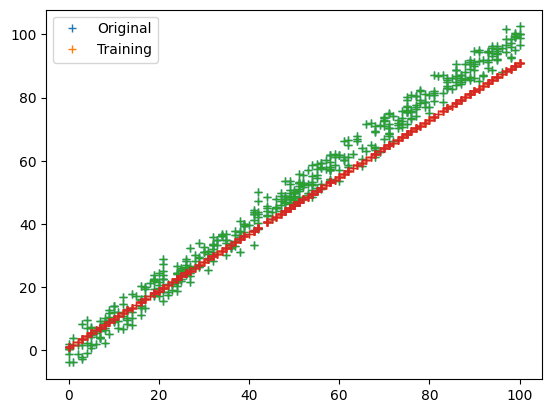

Iteration = 7, Loss = 9.190895027886254


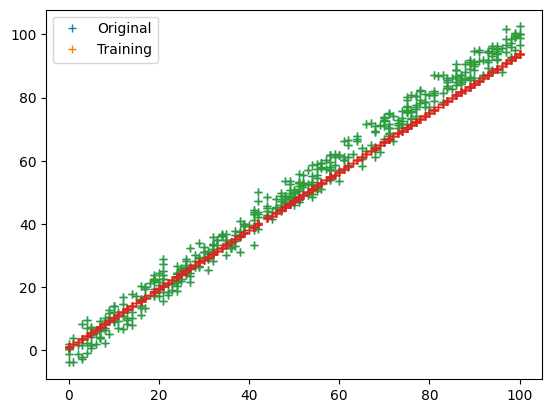

Iteration = 8, Loss = 6.399336807890439


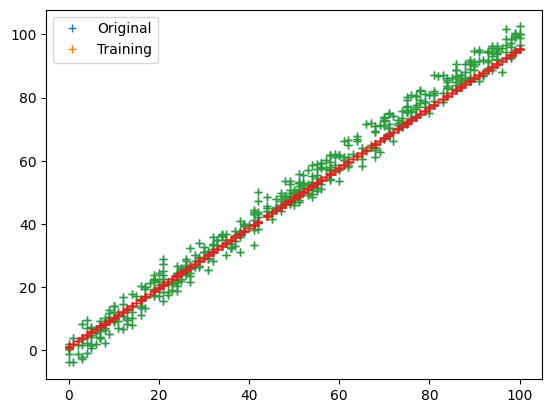

Iteration = 9, Loss = 5.13279905704083


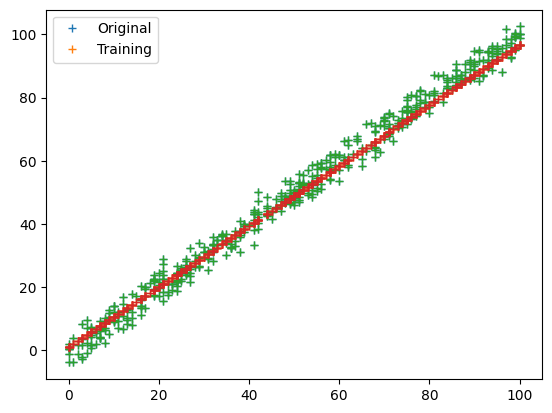

Iteration = 10, Loss = 4.558164782454858


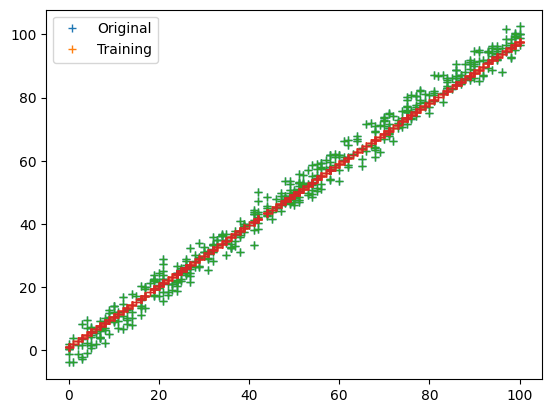

Iteration = 11, Loss = 4.2974478816669635


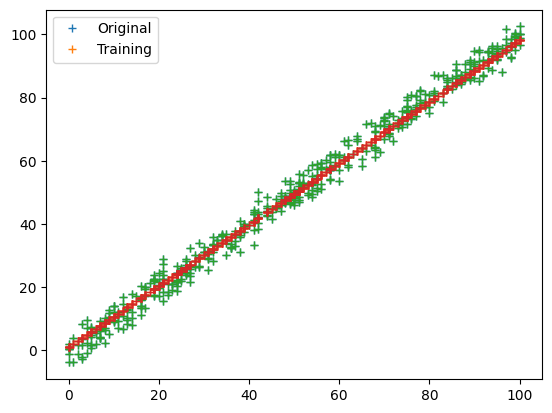

Iteration = 12, Loss = 4.179155641315523


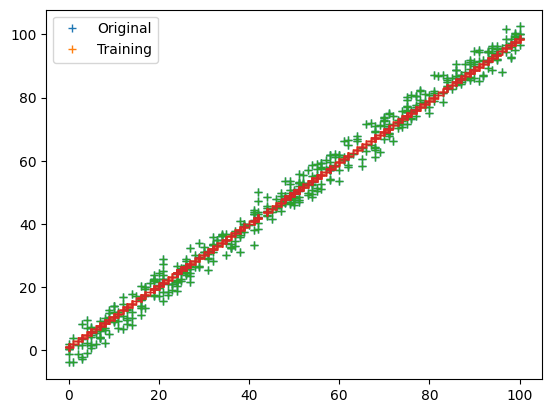

Iteration = 13, Loss = 4.125481627395973


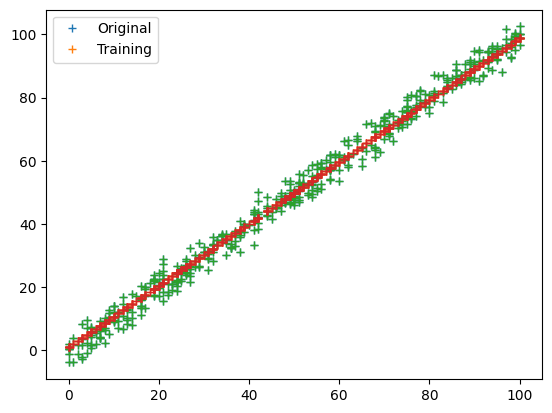

Iteration = 14, Loss = 4.1011249746187985


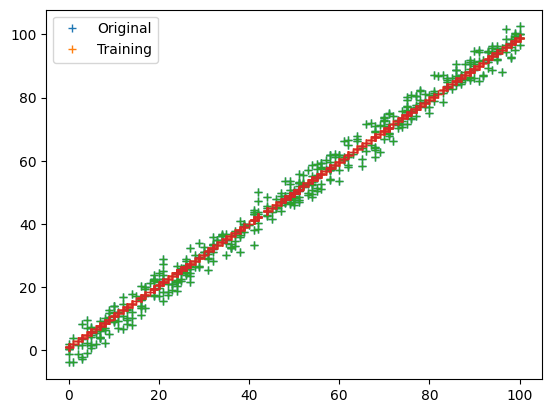

Iteration = 15, Loss = 4.090069641301455


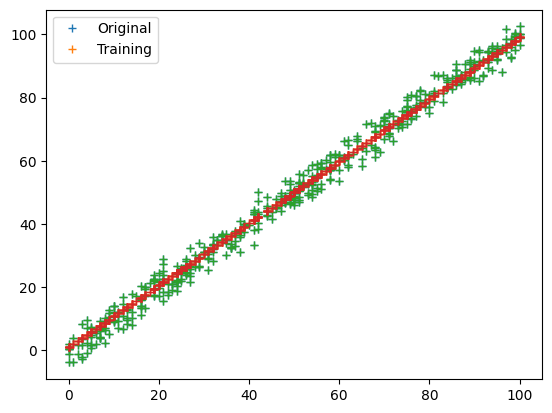

Iteration = 16, Loss = 4.085049131592524


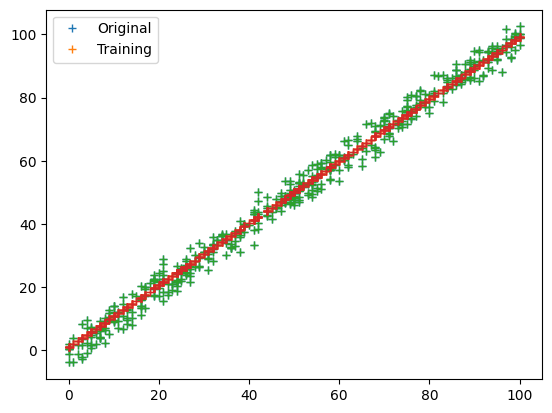

Iteration = 17, Loss = 4.082766628275537


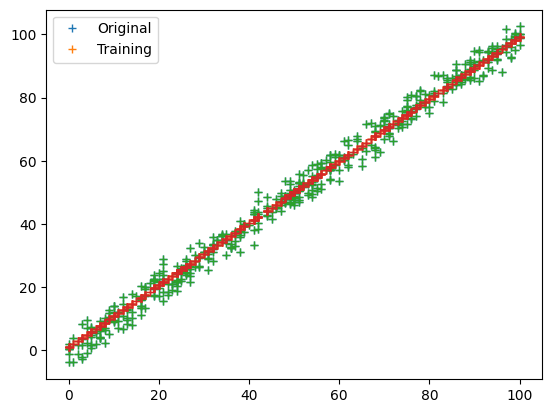

Iteration = 18, Loss = 4.081726361727682


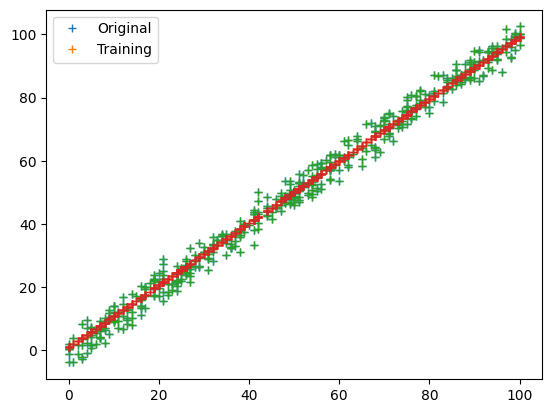

Iteration = 19, Loss = 4.0812496996143


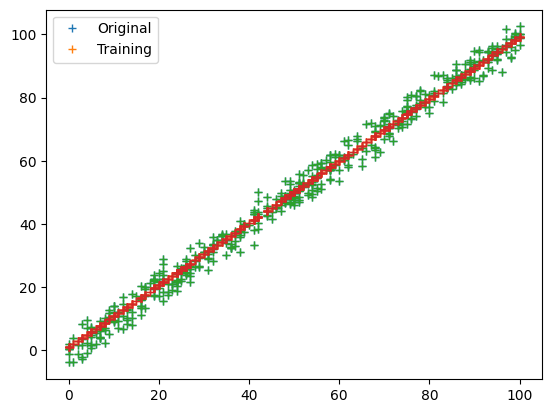

Iteration = 20, Loss = 4.0810287456934615


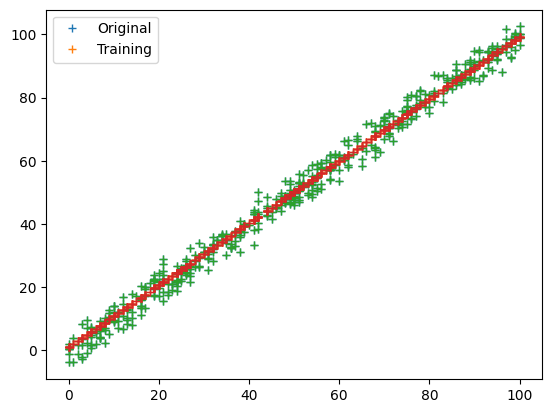

In [44]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [46]:
parameters

{'m': 0.9831629795799439, 'c': 0.9273333911170242}

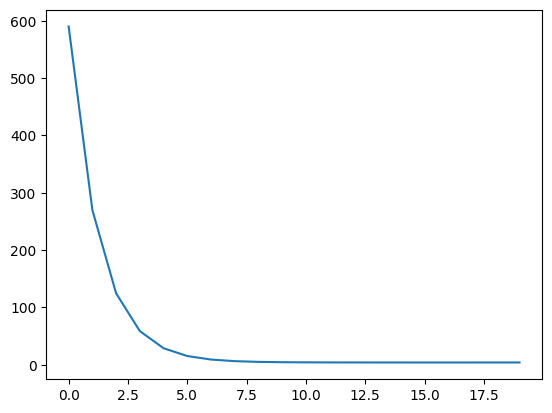

In [47]:
plt.plot(loss)

## Prediction

In [48]:
test_predictions = test_input + parameters['m'] + parameters['c']

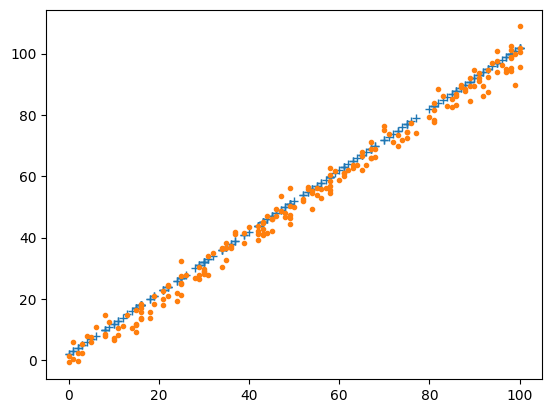

In [50]:
plt.plot(test_input, test_predictions, '+')
plt.plot(test_input, test_output,'.')
plt.show()

` Cost of prediction `

In [51]:
cost_function(test_output, test_predictions)

5.387039594949926